## Binary Classification: ISLR college data
https://cran.r-project.org/web/packages/ISLR/ISLR.pdf
https://www.kaggle.com/ishaanv/ISLR-Auto/data

** Dataset Information: **

777 College information including a flag indicating private or public school

** Attribute Information: (17 features and 1 class)**

- Private A factor with levels No and Yes indicating private or public university
- Apps Number of applications received
- Accept Number of applications accepted
- Enroll Number of new students enrolled
- Top10perc Pct. new students from top 10% of H.S. class
- Top25perc Pct. new students from top 25% of H.S. class
- F.Undergrad Number of fulltime undergraduates
- P.Undergrad Number of parttime undergraduates
- Outstate Out-of-state tuition
- Room.Board Room and board costs
- Books Estimated book costs
- Personal Estimated personal spending
- PhD Pct. of faculty with Ph.D.’s
- Terminal Pct. of faculty with terminal degree
- S.F.Ratio Student/faculty ratio
- perc.alumni Pct. alumni who donate
- Expend Instructional expenditure per student
- Grad.Rate Graduation rate

** Objective of this project **

classify schools as Private or Public based off their features

## Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
# Load Data
df = pd.read_csv('College.csv',index_col=0)

In [3]:
# Inspect Data
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [7]:
df.shape

(777, 18)

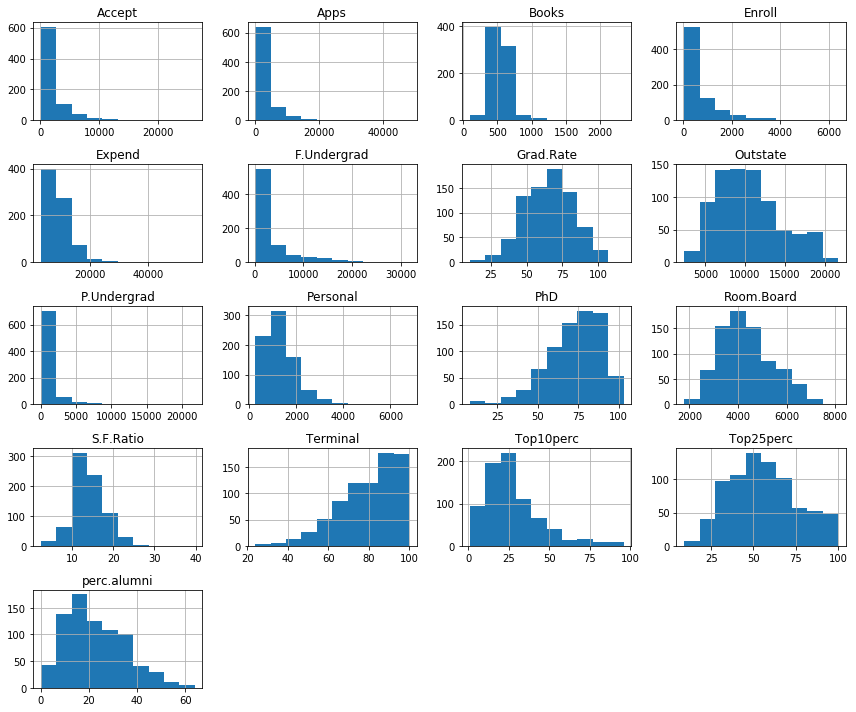

In [9]:
_ = df.hist(figsize=(12,10))
plt.tight_layout()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 135.3+ KB


In [13]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [4]:
df['Private'].value_counts() #imbalanced classes-->stratify

Yes    565
No     212
Name: Private, dtype: int64

In [16]:
df.isnull().any()

Private        False
Apps           False
Accept         False
Enroll         False
Top10perc      False
Top25perc      False
F.Undergrad    False
P.Undergrad    False
Outstate       False
Room.Board     False
Books          False
Personal       False
PhD            False
Terminal       False
S.F.Ratio      False
perc.alumni    False
Expend         False
Grad.Rate      False
dtype: bool

## Data preprocessing

In [5]:
seed = 101 #random seed for reproducibility
np.random.seed(seed)

** Split Features & Class **

In [6]:
X = df.drop('Private',axis=1).values
y = df['Private'].values
print(X.shape,y.shape)

(777, 17) (777,)


** Split Train Test Sets **

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y,random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(621, 17) (156, 17) (621,) (156,)


In [8]:
np.unique(y_train,return_counts=True) #similar ratio to original class

(array(['No', 'Yes'], dtype=object), array([169, 452], dtype=int64))

** Scale features **

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Baseline Models

In [10]:
# Import libraries
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [11]:
models = []
#linear
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
#non-linear
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
#ensemble
models.append(('RF', RandomForestClassifier(n_estimators=100,random_state=seed)))
models.append(('XGB', XGBClassifier(random_state=seed)))

Accuracy: mean +/- std
LR: 93.4% +/- 3.2%
LDA: 93.2% +/- 2.2%
KNN: 92.3% +/- 3.9%
NB: 90.7% +/- 2.7%
DT: 90.7% +/- 2.7%
SVM: 92.6% +/- 2.1%
RF: 93.7% +/- 2.5%
XGB: 94.2% +/- 2.3%


Text(0,0.5,'Accuracy')

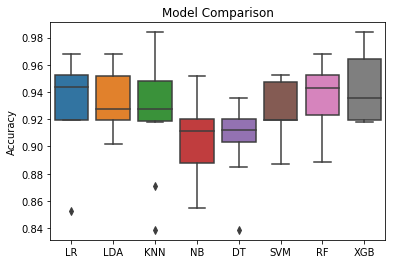

In [12]:
# cross validation
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, random_state=seed)
scoring = 'accuracy'
names = []
results = []
print('Accuracy: mean +/- std')
for name,model in models:
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)    
    print('{}: {:0.1f}% +/- {:0.1f}%'.format(name, cv_results.mean()*100, 
                                             cv_results.std()*100))

# visualize results
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.title('Model Comparison')
plt.ylabel('Accuracy')

## Parameter Tuning
try to improve 4 top algorithms: XGB, RF, LR, LDA

#### Model 1: XGBoost

In [15]:
# Default
model = XGBClassifier(n_estimators=100,random_state=seed)
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 101, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1}


Accuracy of test set: 94.9%


In [28]:
# Grid Search
model = XGBClassifier(random_state=seed)

# parameters
n_estimators = [200,250]
max_depth = [3,4]
learning_rate = [1, 0.5,0.3]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, 
                  learning_rate=learning_rate)
param_grid

# grid search
kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=0)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
0.942029 (0.030038) with: {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 200}
0.942029 (0.030038) with: {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 250}
0.943639 (0.026339) with: {'learning_rate': 1, 'max_depth': 4, 'n_estimators': 200}
0.945250 (0.027254) with: {'learning_rate': 1, 'max_depth': 4, 'n_estimators': 250}
0.948470 (0.024945) with: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}
0.946860 (0.026220) with: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 250}
0.942029 (0.034019) with: {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 200}
0.943639 (0.032492) with: {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 250}
0.948470 (0.023705) with: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200}
0.946860 (0.022874) with: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 250}
0.948470 (0.023783) with: {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 200}

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   14.3s finished


[ 0.02991453  0.03418804  0.01923077  0.03418804  0.0534188   0.11752137
  0.02777778  0.11752137  0.07692308  0.04273504  0.09615385  0.06623932
  0.05555556  0.06837607  0.05769231  0.04700855  0.05555556]


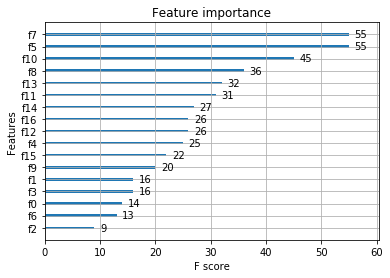

In [29]:
# Feature Importance
from xgboost import plot_importance  
model = XGBClassifier(learning_rate=0.5, max_depth=3, n_estimators=200, 
                      random_state=seed)
model.fit(X_train,y_train)
print(model.feature_importances_)
plot_importance(model)

#### Model 2: RandomForest

In [16]:
# Default
model = RandomForestClassifier(n_estimators=100,random_state=seed)
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 1, 'oob_score': False, 'random_state': 101, 'verbose': 0, 'warm_start': False}


Accuracy of test set: 96.2%


In [44]:
# Grid Search
model = RandomForestClassifier(random_state=seed)

# parameters
n_estimators = [100,150,200,250]
param_grid = dict(n_estimators=n_estimators)
param_grid

# grid search
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   12.7s finished


0.937198 (0.025160) with: {'n_estimators': 100}
0.938808 (0.025570) with: {'n_estimators': 150}
0.938808 (0.025570) with: {'n_estimators': 200}
0.938808 (0.026567) with: {'n_estimators': 250}


Best accuracy of training set: 93.9% using {'n_estimators': 150}
Accuracy of test set: 96.8%


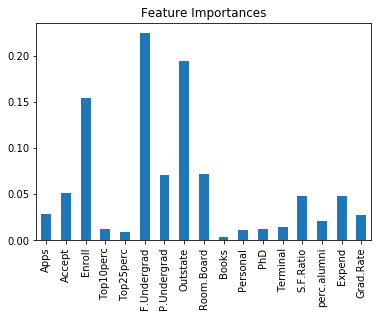

In [38]:
# Feature Importance
model = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=seed)
model.fit(X_train, y_train)
pd.DataFrame(data=model.feature_importances_,
             index=df.drop('Private',axis=1).columns).plot(kind='bar',legend=False,
                                                        title='Feature Importances')

#### Model 3: Logistic Regression

In [39]:
# Default
model = LogisticRegression()
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': 1, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Accuracy of test set: 94.9%


In [40]:
# Grid Search
model = LogisticRegression()

# parameters
penalty = ['l1','l2'] 
C = [1.0, 0.5, 0.2, 0.1, 0.05, 0.01]
param_grid = dict(penalty=penalty, C=C)
param_grid

# grid search
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
0.932367 (0.029006) with: {'C': 1.0, 'penalty': 'l1'}
0.933977 (0.032216) with: {'C': 1.0, 'penalty': 'l2'}
0.933977 (0.023498) with: {'C': 0.5, 'penalty': 'l1'}
0.932367 (0.025171) with: {'C': 0.5, 'penalty': 'l2'}
0.929147 (0.020889) with: {'C': 0.2, 'penalty': 'l1'}
0.925926 (0.027694) with: {'C': 0.2, 'penalty': 'l2'}
0.938808 (0.025715) with: {'C': 0.1, 'penalty': 'l1'}
0.925926 (0.027694) with: {'C': 0.1, 'penalty': 'l2'}
0.933977 (0.027311) with: {'C': 0.05, 'penalty': 'l1'}
0.925926 (0.024574) with: {'C': 0.05, 'penalty': 'l2'}
0.911433 (0.041125) with: {'C': 0.01, 'penalty': 'l1'}
0.929147 (0.025438) with: {'C': 0.01, 'penalty': 'l2'}


Best accuracy of training set: 93.9% using {'C': 0.1, 'penalty': 'l1'}
Accuracy of test set: 94.9%


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.4s finished


#### Model 4: Linear Discriminant Analysis

In [41]:
# Default
model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}


Accuracy of test set: 94.9%


In [42]:
# Grid Search
model = LinearDiscriminantAnalysis()

# parameters
shrinkage = [0, 0.2, 0.4, 0.6, 0.8, 0.9, 1.0]
param_grid = [dict(solver=['svd']),dict(solver=['lsqr'], shrinkage=shrinkage)]
param_grid

# grid search
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
0.932367 (0.021525) with: {'solver': 'svd'}
0.930757 (0.024210) with: {'shrinkage': 0, 'solver': 'lsqr'}
0.924316 (0.023144) with: {'shrinkage': 0.2, 'solver': 'lsqr'}
0.925926 (0.023259) with: {'shrinkage': 0.4, 'solver': 'lsqr'}
0.924316 (0.025032) with: {'shrinkage': 0.6, 'solver': 'lsqr'}
0.916264 (0.026825) with: {'shrinkage': 0.8, 'solver': 'lsqr'}
0.914654 (0.026097) with: {'shrinkage': 0.9, 'solver': 'lsqr'}
0.909823 (0.023351) with: {'shrinkage': 1.0, 'solver': 'lsqr'}


Best accuracy of training set: 93.2% using {'solver': 'svd'}
Accuracy of test set: 94.9%


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished


## Final Model: RandomForest(n_estimators=150)

** Final Model **

In [17]:
model = RandomForestClassifier(n_estimators=150,random_state=seed)
model.fit(X_train, y_train)
accuracy = model.score(X_train, y_train)
print('Accuracy of training set: {:0.1f}%'.format(accuracy*100))

Accuracy of training set: 100.0%


** Save and load the final model **

In [19]:
#save model to disk
import pickle
filename='model.sav'
pickle.dump(model, open(filename, 'wb'))

In [20]:
#load the model from disk
model = pickle.load(open(filename,'rb'))
accuracy = model.score(X_train, y_train)
print('Accuracy of training set: {:0.1f}%'.format(accuracy*100))

Accuracy of training set: 100.0%


** Classification report & Confusion Matrix **

             precision    recall  f1-score   support

         No       1.00      1.00      1.00       169
        Yes       1.00      1.00      1.00       452

avg / total       1.00      1.00      1.00       621



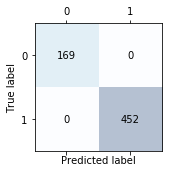

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#classification report
print(classification_report(y_train, model.predict(X_train)))

#confusion matrix
confmat = confusion_matrix(y_train, model.predict(X_train))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## Model Evaluation with Test set

In [23]:
# predict class with test set (new, unseen)
y_pred = model.predict(X_test)
print('Accuracy of test set: {:0.1f}%'.format(accuracy_score(y_test,y_pred)*100))

Accuracy of test set: 96.8%


             precision    recall  f1-score   support

         No       0.97      0.91      0.94        43
        Yes       0.97      0.99      0.98       113

avg / total       0.97      0.97      0.97       156



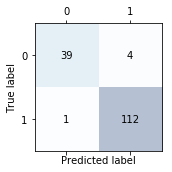

In [24]:
#classification report
print(classification_report(y_test, model.predict(X_test)))

#confusion matrix
confmat = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## Summary

Best model: ** RandomForest ** w/param: n_estimators=150

Accuracy of test set: ** 96.8% **